In [2]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")


import plotly.express as px


In [5]:
from google.colab import files
print("📂 Upload your dataset (CSV format)...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv("patients.csv")
print(f"\n✅ Data loaded successfully! Shape: {df.shape}")

📂 Upload your dataset (CSV format)...


Saving patients.csv to patients (1).csv

✅ Data loaded successfully! Shape: (1000, 7)


In [6]:
print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Statistical Summary ---")
display(df.describe(include='all'))

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- First 5 Rows ---


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB

--- Statistical Summary ---


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
count,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,1000,993,NaN,344,337,4,NaN
top,PAT-e2ef9c5f,Michael Miller,NaN,2025-01-19,2025-10-16,emergency,NaN
freq,1,2,NaN,9,8,263,NaN
mean,NaN,NaN,45.337000,NaN,NaN,NaN,79.597000
std,NaN,NaN,25.999912,NaN,NaN,NaN,11.550325
min,NaN,NaN,0.000000,NaN,NaN,NaN,60.000000
25%,NaN,NaN,23.000000,NaN,NaN,NaN,70.000000
50%,NaN,NaN,46.000000,NaN,NaN,NaN,80.000000
75%,NaN,NaN,68.000000,NaN,NaN,NaN,89.250000



--- Missing Values ---
patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64


In [7]:
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 1000, Columns: 7


In [8]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
patient_id        object
name              object
age                int64
arrival_date      object
departure_date    object
service           object
satisfaction       int64
dtype: object


In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
print("\n--- Categorical Columns ---")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")



--- Categorical Columns ---
patient_id: 1000 unique values
name: 993 unique values
arrival_date: 344 unique values
departure_date: 337 unique values
service: 4 unique values


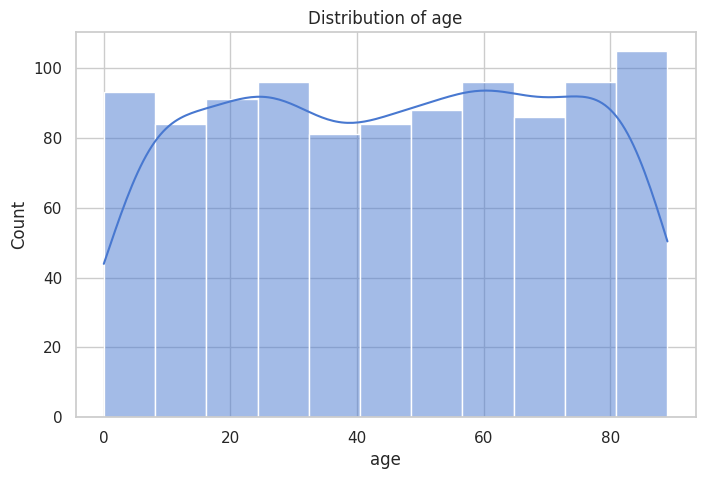

In [10]:
# Example 1: Distribution of numeric feature
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    plt.figure(figsize=(8,5))
    sns.histplot(df[num_cols[0]], kde=True)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.show()

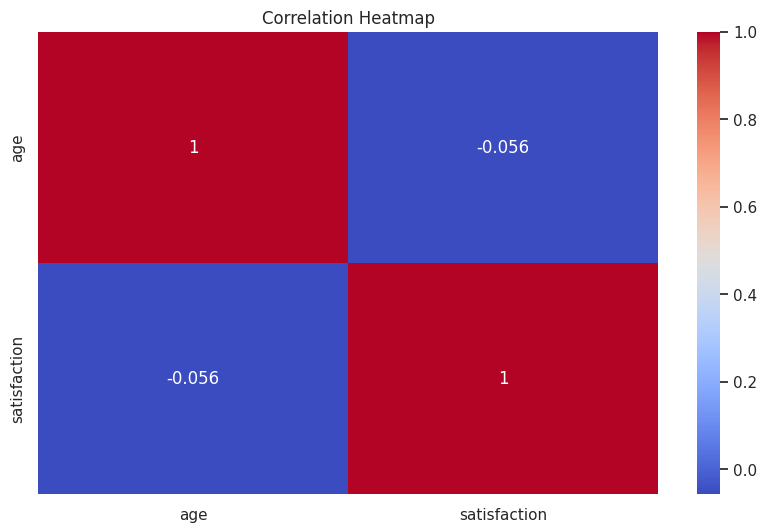

In [11]:
# Example 2: Correlation heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

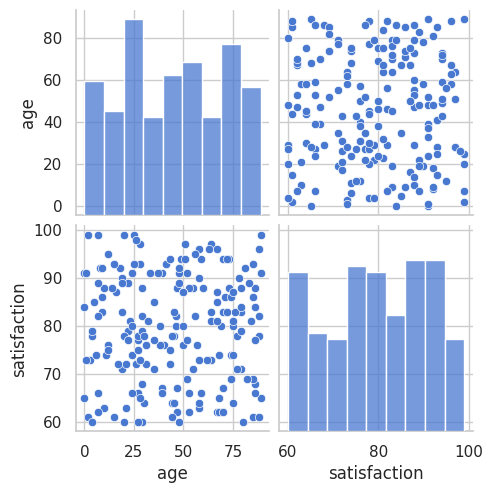

In [12]:
# Example 3: Pairplot (numeric columns only)
if len(num_cols) >= 2:
    sns.pairplot(df[num_cols].sample(min(200, len(df)), axis=0))
    plt.show()

In [13]:
# Example 4: Interactive Plot with Plotly
if len(num_cols) >= 2:
    fig = px.scatter(df, x=num_cols[0], y=num_cols[1],
                     title=f"Interactive Scatter: {num_cols[0]} vs {num_cols[1]}")
    fig.show()

In [14]:
# Fill missing numeric values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-4269953371.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [15]:
# Fill missing categorical values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled successfully!")



✅ Missing values handled successfully!


/tmp/ipython-input-2247704210.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"✅ Duplicates removed. New shape: {df.shape}")

✅ Duplicates removed. New shape: (1000, 7)


In [17]:
# === 7. Save Cleaned Data ===
df.to_csv('cleaned_data.csv', index=False)
print("\n💾 Cleaned data saved as 'cleaned_data.csv'")
files.download('cleaned_data.csv')


💾 Cleaned data saved as 'cleaned_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!pip install -q ydata-profiling

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile.to_notebook_iframe()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 28.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
from google.colab import files
files.download('EDA_Project.ipynb')


FileNotFoundError: Cannot find file: EDA_Project.ipynb